In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import warnings 
warnings.filterwarnings("ignore")


In [5]:
an1=pd.read_csv("wine.csv")
an1

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
an=an1.to_numpy()

In [8]:
an

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [9]:
an1.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [10]:
an1['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [11]:
an1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
print(scaler.fit(an))
scaled_data=scaler.transform(an)

In [15]:
scaled_data

array([[0.        , 0.84210526, 0.1916996 , ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.        , 0.57105263, 0.2055336 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.        , 0.56052632, 0.3201581 , ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [1.        , 0.58947368, 0.69960474, ..., 0.08943089, 0.10622711,
        0.39728959],
       [1.        , 0.56315789, 0.36561265, ..., 0.09756098, 0.12820513,
        0.40085592],
       [1.        , 0.81578947, 0.66403162, ..., 0.10569106, 0.12087912,
        0.20114123]])

# PCA(Principle component analysis)

In [17]:
pca=PCA(n_components=3)
pca.fit(scaled_data)

PCA(n_components=3)

In [18]:
x_pca=pca.transform(scaled_data)
print(an.shape)
print(x_pca.shape)

(178, 14)
(178, 3)


In [19]:
x_pca

array([[-8.47604157e-01, -2.43146319e-01,  2.97517320e-02],
       [-6.78650796e-01, -5.71173919e-03, -2.83969737e-01],
       [-7.00372235e-01, -1.83868071e-01,  1.97457120e-01],
       [-9.36075984e-01, -5.66966744e-01,  9.39186724e-02],
       [-4.54077045e-01, -6.33477143e-02,  2.86092048e-01],
       [-7.76939473e-01, -4.80602207e-01, -8.16766386e-02],
       [-7.28890640e-01, -2.95579430e-01, -1.12514825e-01],
       [-6.75292365e-01, -2.95566897e-01, -1.39489615e-02],
       [-6.90985736e-01, -3.03638910e-01, -2.34859068e-01],
       [-7.82069689e-01, -1.97958114e-01, -1.06020987e-01],
       [-8.65905159e-01, -3.45985665e-01, -4.57555248e-02],
       [-5.95351505e-01, -2.25308491e-01, -2.97683698e-01],
       [-6.51638553e-01, -2.29723700e-01, -1.78093164e-01],
       [-7.94438621e-01, -3.48487170e-01, -1.00092289e-01],
       [-9.52372705e-01, -5.24594574e-01, -1.11105793e-01],
       [-6.69525434e-01, -3.34299325e-01, -8.37164255e-02],
       [-6.33418157e-01, -4.48567906e-01

Text(0, 0.5, 'PCA1')

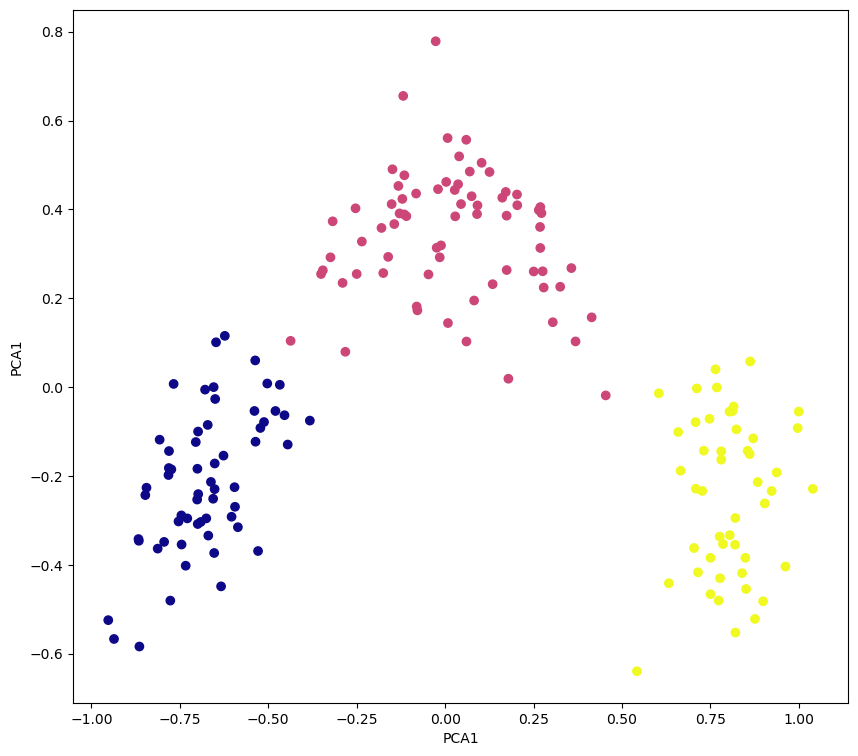

In [21]:
plt.figure(figsize=(10,9))
plt.scatter(x_pca[:,0],x_pca[:,1],c=an1['Type'],cmap='plasma')
plt.xlabel('PCA1')
plt.ylabel('PCA1')

In [22]:
pca.components_

array([[ 0.6293282 , -0.11538334,  0.18694541, -0.00605884,  0.14898351,
        -0.06546653, -0.29907772, -0.32479936,  0.23920701, -0.18419798,
         0.08078851, -0.20189805, -0.37170465, -0.2400427 ],
       [ 0.01993018, -0.54791647, -0.2344791 , -0.16351603,  0.07620456,
        -0.18485315, -0.06219328,  0.01015402, -0.02206778, -0.02268177,
        -0.52014852,  0.24253447,  0.22768572, -0.43761144],
       [ 0.03341574, -0.08752348,  0.49369469,  0.39251169,  0.47666736,
         0.01701346,  0.26790425,  0.20701857,  0.23278396,  0.24925826,
        -0.02422129, -0.1201589 ,  0.30702977, -0.16025723]])

In [23]:
df=pd.concat([pd.DataFrame(x_pca[:,0:3],columns=['pc1','pc2','pc3']),an1[['Type']]],axis=1)

In [26]:
df

,pc1,pc2,pc3,Type
0,-0.847604,-0.243146,0.029752,1
1,-0.678651,-0.005712,-0.283970,1
2,-0.700372,-0.183868,0.197457,1
3,-0.936076,-0.566967,0.093919,1
4,-0.454077,-0.063348,0.286092,1
...,...,...,...,...
173,0.898916,-0.482112,0.203259,3
174,0.785427,-0.353231,0.088418,3
175,0.820658,-0.552469,-0.020750,3
176,0.777268,-0.430255,-0.095511,3


In [27]:
df_comp=pd.DataFrame(pca.components_,columns=an1.columns.values)
df_comp

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.629328,-0.115383,0.186945,-0.006059,0.148984,-0.065467,-0.299078,-0.324799,0.239207,-0.184198,0.080789,-0.201898,-0.371705,-0.240043
1,0.019930,-0.547916,-0.234479,-0.163516,0.076205,-0.184853,-0.062193,0.010154,-0.022068,-0.022682,-0.520149,0.242534,0.227686,-0.437611
2,0.033416,-0.087523,0.493695,0.392512,0.476667,0.017013,0.267904,0.207019,0.232784,0.249258,-0.024221,-0.120159,0.307030,-0.160257


<AxesSubplot:>

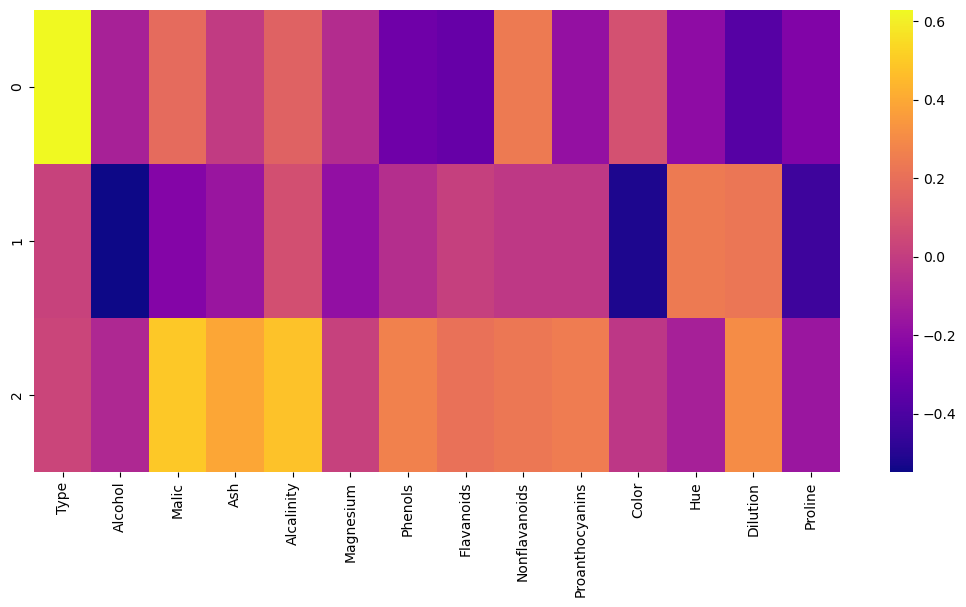

In [29]:
plt.figure(figsize=(13,6))
sns.heatmap(df_comp,cmap='plasma')

# HIERARCHICL CLUSTRING

In [30]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage

In [31]:
a=linkage(df,method='complete',metric='euclidean')

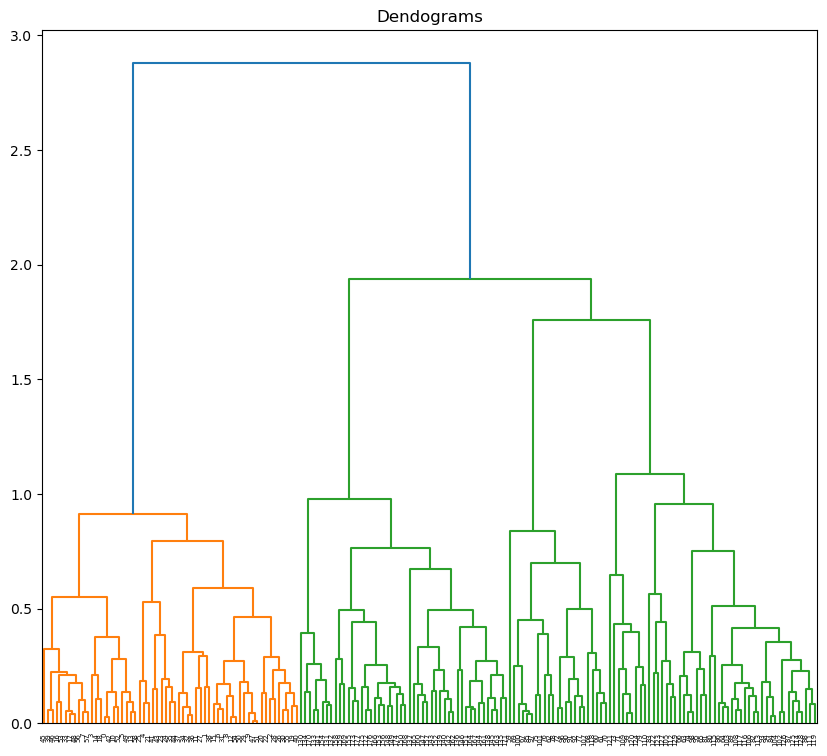

In [32]:
plt.figure(figsize=(10,9))
plt.title("Dendograms")
dendogram=sch.dendrogram(sch.linkage(df,method='complete'))

In [33]:
h_c=AgglomerativeClustering(n_clusters=3,linkage='complete',affinity='euclidean').fit(df)
h_c.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [36]:
cluster_labels=pd.Series(h_c.labels_)


In [38]:
df['clust']=cluster_labels
df

,pc1,pc2,pc3,Type,clust
0,-0.847604,-0.243146,0.029752,1,1
1,-0.678651,-0.005712,-0.283970,1,1
2,-0.700372,-0.183868,0.197457,1,1
3,-0.936076,-0.566967,0.093919,1,1
4,-0.454077,-0.063348,0.286092,1,1
...,...,...,...,...,...
173,0.898916,-0.482112,0.203259,3,2
174,0.785427,-0.353231,0.088418,3,2
175,0.820658,-0.552469,-0.020750,3,2
176,0.777268,-0.430255,-0.095511,3,2


In [39]:
df['clust'].value_counts()

0    71
1    59
2    48
Name: clust, dtype: int64

In [40]:
h_c.fit(df)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [43]:
from sklearn.metrics import silhouette_score as sil

In [46]:
nc=[2,3,4,5,6,7,8,9]
sc_score=[]
for i in nc:
    hc=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='complete')
    y=hc.fit_predict(df.iloc[:,[1,2,3]])
    sc_score.append(sil(df.iloc[:,[1,2,3]],y))

In [47]:
sc_score

[0.5724168689866392,
 0.6647400842321546,
 0.6364106872872956,
 0.6173179050366149,
 0.5125004434407174,
 0.4133604135759335,
 0.2388887989098471,
 0.299303125014994]

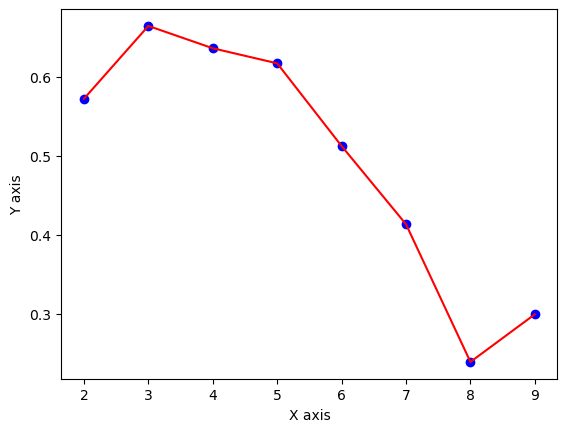

In [49]:
plt.plot(nc,sc_score,color='red')
plt.scatter(nc,sc_score,color='blue')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

In [50]:
df.drop(['clust'],axis=1,inplace=True)
df

,pc1,pc2,pc3,Type
0,-0.847604,-0.243146,0.029752,1
1,-0.678651,-0.005712,-0.283970,1
2,-0.700372,-0.183868,0.197457,1
3,-0.936076,-0.566967,0.093919,1
4,-0.454077,-0.063348,0.286092,1
...,...,...,...,...
173,0.898916,-0.482112,0.203259,3
174,0.785427,-0.353231,0.088418,3
175,0.820658,-0.552469,-0.020750,3
176,0.777268,-0.430255,-0.095511,3


# KMEANS

In [58]:
from sklearn.cluster import KMeans


In [60]:
TWSS=[]
k=list(range(1,6))



for i in k:
    Kmeans=KMeans(n_clusters=i)
    Kmeans.fit(df)
    TWSS.append(Kmeans.inertia_)

Text(0, 0.5, 'total_within_ss')

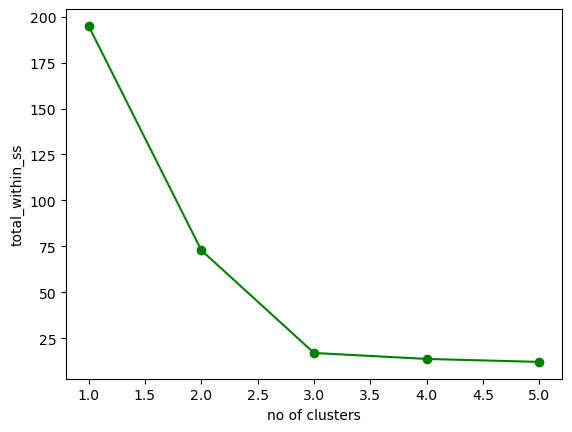

In [66]:
TWSS 
plt.plot(k,TWSS,'ro-',color='green')

plt.xlabel("no of clusters")
plt.ylabel('total_within_ss')

In [67]:
model=KMeans(n_clusters=4)
model.fit(df)

KMeans(n_clusters=4)

In [69]:
model.labels_
md=pd.Series(model.labels_)
df['K-Means']=md

In [70]:
df

,pc1,pc2,pc3,Type,K-Means
0,-0.847604,-0.243146,0.029752,1,1
1,-0.678651,-0.005712,-0.283970,1,1
2,-0.700372,-0.183868,0.197457,1,1
3,-0.936076,-0.566967,0.093919,1,1
4,-0.454077,-0.063348,0.286092,1,1
...,...,...,...,...,...
173,0.898916,-0.482112,0.203259,3,0
174,0.785427,-0.353231,0.088418,3,0
175,0.820658,-0.552469,-0.020750,3,0
176,0.777268,-0.430255,-0.095511,3,0


In [71]:
Kmeans=KMeans(n_clusters=4)
predict=Kmeans.fit_predict(df)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [72]:
cluster_new=KMeans(4,random_state=44)
cluster_new.fit(df)

KMeans(n_clusters=4, random_state=44)

In [73]:
cluster_new1=KMeans(4,random_state=44)
cluster_new1.fit(df)

KMeans(n_clusters=4, random_state=44)

# CLUSTERING MODEL OF ORIGINAL DATA

In [74]:
df=pd.read_csv("wine.csv")

In [75]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [76]:
df.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

# scaling

In [80]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [82]:
df_norm=norm_func(df.iloc[:,1:])
df_norm.iloc[:,:]

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


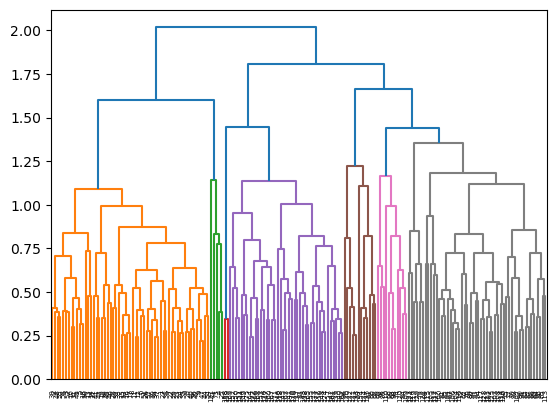

In [83]:
dendogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

In [84]:
??AgglomerativeClustering

In [85]:
dfhc=AgglomerativeClustering(n_clusters=6, affinity='euclidean',linkage='complete')

In [86]:
df_hc=dfhc.fit_predict(df_norm)

In [87]:
df['h_clusterid']=df_hc
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,4
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,4
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,4
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


# K_MEANS CLUSTRING

In [88]:
df_norm

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [89]:
model_Kmeans=KMeans(n_clusters=7)
df_scaled=model_Kmeans.fit(df_norm)
model_Kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6,
       1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 6, 1, 6,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 4, 2, 2, 5, 5,
       2, 2, 4, 2, 4, 2, 2, 1, 2, 2, 2, 4, 2, 6, 2, 2, 5, 4, 2, 2, 5, 5,
       5, 5, 5, 5, 4, 6, 2, 1, 0, 2, 2, 6, 2, 2, 6, 2, 2, 5, 2, 5, 2, 5,
       6, 2, 5, 5, 5, 5, 2, 5, 4, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 0, 0,
       0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 3, 3, 3, 3, 0, 0, 0, 3,
       4, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       3, 3])

In [90]:
df['labels']=pd.Series(model_Kmeans.labels_)
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid,labels
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,4,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,4,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,4,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3,3
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3,3
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3,3
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3,3


In [91]:
df.groupby(['labels'])["Type"].apply(lambda x:tuple(x))
model_Kmeans.cluster_centers_

array([[0.45146199, 0.3783487 , 0.5959596 , 0.57044674, 0.4794686 ,
        0.18773946, 0.18002813, 0.18238994, 0.22853137, 0.43505878,
        0.17163505, 0.09320309, 0.21421778],
       [0.71907895, 0.23013128, 0.58384263, 0.33615611, 0.41498447,
        0.65246305, 0.56148282, 0.29548518, 0.48405813, 0.36570575,
        0.48170732, 0.69276557, 0.60941003],
       [0.37584586, 0.1295878 , 0.35676089, 0.39874816, 0.2503882 ,
        0.47019704, 0.37530139, 0.26819407, 0.36998648, 0.172294  ,
        0.50987224, 0.58895866, 0.18519462],
       [0.62138158, 0.56529974, 0.5842246 , 0.5790378 , 0.29302536,
        0.26752874, 0.09150844, 0.64701258, 0.28930074, 0.65621444,
        0.12228997, 0.14072039, 0.26384926],
       [0.475     , 0.41831357, 0.52606952, 0.48002577, 0.28894928,
        0.24252874, 0.1008263 , 0.72641509, 0.170347  , 0.29589733,
        0.28678862, 0.22725885, 0.23968735],
       [0.26613272, 0.18826259, 0.6114857 , 0.61138503, 0.23582231,
        0.40809595, 0.39304